# Filter out non english sources

In [253]:
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from pickle import dump, load

dataset = pd.read_csv('data/EveryArticle.csv')

articles.head(5)

,TITLE,TEXT,SUMMARY
0,Tina Fey plays sexual predator for laughs on T...,Thursday night’s episode of the TV comedy seri...,Thursday night’s episode of the TV comedy seri...
1,NAFTA's future remains unclear as talks continue,Few clues emerged from President Donald Trump’...,Few clues emerged from President Donald Trump’...
2,ISIS recruiter 'White Widow' believed dead aft...,Sally “White Widow” Jones – one of the most no...,Sally “White Widow” Jones – one of the most no...
3,Florida man set on fire after losing NFL bet,A bet between family members watching a Nation...,A bet between family members watching a Nation...
4,Former runner takes on 5K 9 years after tragic...,"On July 27, 2009, Stormy Cushing was on her wa...","On July 27, 2009, Stormy Cushing was on her wa..."


In [261]:
pattern = r'http(s)?:\/\/.*\.[com|ca|uk].*'
chinese_sites_pattern = r'http(s)?:\/\/cn\..*\.com.*'

articles = dataset.drop_duplicates()
articles = dataset[dataset['URL'].str.contains(pattern)]

articles = articles[~articles['URL'].str.contains(chinese_sites_pattern)]

rejected = pd.concat([dataset,articles]).drop_duplicates(keep=False)

print(len(rejected))

rejected.head(5)

11472


,Unnamed: 0,Unnamed: 0.1,KEYWORDS,SUMMARY,TEXT,TITLE,URL
455,574,284,"['machines', 'used', 'say', 'weapons', 'theyre...","And while they might not look like much, exper...",Transcript\n\n>>\n\nA pop song celebrating a N...,The mechanical hero behind North Korea's nukes,https://www.reuters.tv/v/aaH/2017/10/12/the-me...
1878,2254,9,"['dont', 'debunking', 'need', 'fund', 'mutual'...",Myths about mutual funds are the third sort an...,ADVERTISEMENT\n\nA myth is defined as a widely...,Debunking Some Key Mutual Fund Myths,http://www.huffingtonpost.in/cleartax/debunkin...
1879,2255,10,"['cette', 'drôle', 'plus', 'le', 'les', 'du', ...","CINÉMA - Un tremblement de terre, et la fin d'...","CINÉMA - Un tremblement de terre, et la fin d'...",Cette blague de 2013 sur Harvey Weinstein pren...,http://www.huffingtonpost.fr/2017/10/11/cette-...
1882,2260,15,"['sc', 'world', 'morning', 'marriage', 'child'...",ADVERTISEMENTThe Morning Wrap is HuffPost Indi...,ADVERTISEMENT\n\nThe Morning Wrap is HuffPost ...,The Morning Wrap: SC Delivers A Blow To Child ...,http://www.huffingtonpost.in/2017/10/11/the-mo...
1883,2261,16,"['means', 'roshan', 'needs', 'woman', 'right',...",By the time you reach the sixth or the seventh...,"ADVERTISEMENT\n\nThe Kangana-Hrithik affair, i...",If Farhan Akhtar Thinks Hrithik Roshan Was Dis...,http://www.huffingtonpost.in/2017/10/09/if-far...


In [262]:
rejected.tail(5)

,Unnamed: 0,Unnamed: 0.1,KEYWORDS,SUMMARY,TEXT,TITLE,URL
110020,133749,232,"['nugent谈起茱莉泰摩julie', 'taymor的时候真的非常兴奋我有时候觉得由于...",剧作家黄哲伦(David Henry Hwang)友好地警告我，他可能会回避一些问题。他的作...,剧作家黄哲伦(David Henry Hwang)友好地警告我，他可能会回避一些问题。他的作...,阔别20年，《蝴蝶君》重返百老汇,https://cn.nytstyle.com/culture/20171023/new-f...
110058,133792,275,"['recognized', '正是这部电影将这个过时的英文词语介绍给了许多观众一些人也把这...",关键词：Concubine \ˈkɒŋkjʊbʌɪn\ 妾中国女性史诗小说《喜福会》的作者谭...,关键词：Concubine \ˈkɒŋkjʊbʌɪn\ 妾\n\n中国女性史诗小说《喜福会》...,Concubine：名为“妾”的历史幽灵,https://cn.nytstyle.com/culture/20171019/t19wo...
110073,133808,291,"['times', '美国电动汽车制造厂特斯拉tesla计划在上海建生产线', '陈扎克伯格...",早安。以下是今日不容错过的新闻：• 据日本公共广播电台NHK报道，安倍晋三(Shinzo A...,早安。\n\n以下是今日不容错过的新闻：\n\n• 据日本公共广播电台NHK报道，安倍晋三(...,\n,https://cn.nytstyle.com/morning-brief/20171023...
110076,133812,295,"['stalins', 'war', 'stalin在内的8本书的作者', '翻译纽约时报中...",《红色饥荒：斯大林对乌克兰的战争》(RED FAMINE: Stalin’s War on ...,《红色饥荒：斯大林对乌克兰的战争》\n\n(RED FAMINE: Stalin’s War...,\n,https://cn.nytstyle.com/culture/20171020/red-f...
110081,133818,301,"['纽约时报中文网', 'daniel', 'york', '国际纵览', 'berehul...",Daniel Berehulak for The New York Times马尼拉一间警察...,Daniel Berehulak for The New York Times\n\n马尼拉...,纽约时报中文网 国际纵览,https://cn.nytimes.com/topic/20160427/pulitzer...


In [263]:
articles = articles[['TITLE', 'TEXT', 'SUMMARY']]
print(len(articles))
articles = articles.drop_duplicates()
print(len(articles))
articles = articles.reset_index(drop=True)


print(articles.head())
print(len(articles))
for i in range(2):
    print("Article #", i+1)
    print(articles.TITLE[i])
    print(articles.SUMMARY[i])
    print(articles.TEXT[i])
    print()

articles.to_csv('data/EnglishArticles.csv')

98631
34038
                                               TITLE  \
0  Tina Fey plays sexual predator for laughs on T...   
1   NAFTA's future remains unclear as talks continue   
2  ISIS recruiter 'White Widow' believed dead aft...   
3       Florida man set on fire after losing NFL bet   
4  Former runner takes on 5K 9 years after tragic...   

                                                TEXT  \
0  Thursday night’s episode of the TV comedy seri...   
1  Few clues emerged from President Donald Trump’...   
2  Sally “White Widow” Jones – one of the most no...   
3  A bet between family members watching a Nation...   
4  On July 27, 2009, Stormy Cushing was on her wa...   

                                             SUMMARY  
0  Thursday night’s episode of the TV comedy seri...  
1  Few clues emerged from President Donald Trump’...  
2  Sally “White Widow” Jones – one of the most no...  
3  A bet between family members watching a Nation...  
4  On July 27, 2009, Stormy Cushing was

# Clean texts

In [3]:
import pandas as pd
from nltk.corpus import stopwords
from pickle import dump

articles = pd.read_csv('data/EnglishArticles.csv')
print(articles.shape)
print(articles.head())
print(articles.isnull().sum())

contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
}

# nltk.download('stopwords')


def clean_text(text, remove_stopwords=True, remove_interpunction=True):
    import re

    text = text.lower()

    text = text.split()
    new_text = []

    for word in text:
        if word in contractions:
            new_text.append(contractions[word])
        else:
            new_text.append(word)

    text = " ".join(new_text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    if remove_interpunction:
        text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)

    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text


articles['cleaned_text'] = articles['TEXT'].apply(
    lambda text: clean_text(text))
print("Texts are cleaned for Classic.")

articles['bert_cleaned_text'] = articles['SUMMARY'].apply(
    lambda text: clean_text(text, remove_interpunction=True),)
print("Texts are cleaned for BERT.")

articles['cleaned_summary'] = articles['SUMMARY'].apply(
    lambda text: clean_text(text, remove_stopwords=False, remove_interpunction=False),)
print("Summaries are cleaned.")

articles = articles[['TITLE', 'cleaned_text', 'cleaned_summary']]
print(articles.shape)
print(articles.head())
print(articles.isnull().sum())

articles.to_csv('data/CleanedArticles.csv')

(8131, 4)
   Unnamed: 0                                              TITLE  \
0           0  The Latest: Blaze in Sierra Nevada destroys do...   
1           1  Facebook's Sandberg meets with lawmakers amid ...   
2           2  Disney alum Tiffany Thornton defends marriage ...   
3           3  A massive hole just opened up in Antarctica's ...   
4           4  Mazda patents active rear spoiler design inspi...   

                                                TEXT  \
0  The Latest on wildfires in California (all tim...   
1  One of Facebook's top executives met Wednesday...   
2  Former Disney star Tiffany Thornton is facing ...   
3  Thanks to its usefulness as an indicator of ho...   
4  Mazda certainly has been on a patent spree as ...   

                                             SUMMARY  
0  The Latest on wildfires in California (all tim...  
1  One of Facebook's top executives met Wednesday...  
2  Former Disney star Tiffany Thornton is facing ...  
3  Thanks to its usefuln

## Split data

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

articles = pd.read_csv('data/CleanedArticles.csv')
print(articles.shape)
print(articles.head())
print(articles.isnull().sum())

articles_train, articles_test = train_test_split(
    articles[['TITLE', 'cleaned_text', 'cleaned_summary']], test_size=0.33, random_state=33)

X_train, X_test, names = [], [], []

for article_title, article_summary, article_content in articles_train.values:
    X_train.append(article_summary)

for article_title, article_summary, article_content in articles_test.values:
    X_test.append(article_summary)
    names.append(article_title)
    
np.save('bert/bert_train_texts', np.array(X_train))
np.save('bert/bert_test_texts', np.array(X_test))
np.save('bert/names', names)


(8131, 4)
   Unnamed: 0                                              TITLE  \
0           0  The Latest: Blaze in Sierra Nevada destroys do...   
1           1  Facebook's Sandberg meets with lawmakers amid ...   
2           2  Disney alum Tiffany Thornton defends marriage ...   
3           3  A massive hole just opened up in Antarctica's ...   
4           4  Mazda patents active rear spoiler design inspi...   

                                        cleaned_text  \
0  latest wildfires california times local 6 10 o...   
1  one facebook top executives met wednesday hous...   
2  former disney star tiffany thornton facing bac...   
3  thanks usefulness indicator badly humans messi...   
4  mazda certainly patent spree late reported ast...   

                                     cleaned_summary  
0  the latest on wildfires in california (all tim...  
1  one of facebook s top executives met wednesday...  
2  former disney star tiffany thornton is facing ...  
3  thanks to its usefuln

# Classic vectorizers

In [5]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# nltk.download('wordnet')
# nltk.download('punkt')
wordnet_lemmatizer = WordNetLemmatizer()


def tokenizer(text):
    tktext = word_tokenize(text)
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in tktext]
    return lemmas

articles_train_contents = articles_train['cleaned_text'].values
articles_test_contents = articles_test['cleaned_text'].values

## Bag of Words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import save_npz

bow_vectorizer = CountVectorizer(tokenizer=tokenizer,
                             ngram_range=(1, 2),
                             analyzer='word',
                             max_features=None)

bow_train_vectors = bow_vectorizer.fit_transform(articles_train['cleaned_text'])
bow_test_vectors = bow_vectorizer.transform(articles_test['cleaned_text'])

save_npz("classic/bow_train_vector.npz", bow_train_vectors)
save_npz("classic/bow_test_vector.npz", bow_test_vectors)

## TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import save_npz

tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer, ngram_range=(
    1, 2), analyzer='word', max_features=None)

tfidf_train_vectors = tfidf_vectorizer.fit_transform(articles_train['cleaned_text'])
tfidf_test_vectors = tfidf_vectorizer.transform(articles_test['cleaned_text'])

save_npz("classic/tfidf_train_vector.npz", tfidf_train_vectors)
save_npz("classic/tfidf_test_vector.npz", tfidf_test_vectors)

## Word2Vec

In [115]:
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

pairs = [
    ('computer', 'laptop'),  
    ('computer', 'keyboard'),
    ('computer', 'smartphone'),
    ('computer', 'cereal'),
    ('computer', 'anarchy'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))
    
word2vec_model.save('classic/word2vec_model')

'computer'	'laptop'	0.66
'computer'	'keyboard'	0.40
'computer'	'smartphone'	0.33
'computer'	'cereal'	0.17
'computer'	'anarchy'	0.04


In [116]:
from gensim.models import Word2Vec
import numpy as np

def word2vec_vectorize_text(text):
    vector = []
    for word in tokenizer(text):
        try:
            vector.append(word2vec_model[word])
        except KeyError:
            pass
    return np.average(vector)

def word2vec_vectorizer(texts):
     return np.array([word2vec_vectorize_text(content) for content in texts])

word2vec_train_vectors = word2vec_vectorizer(articles_train_contents).reshape(-1, 1)
word2vec_test_vectors = word2vec_vectorizer(articles_test_contents).reshape(-1, 1)

np.save('classic/word2vec_train_vector', word2vec_train_vectors)
np.save('classic/word2vec_test_vector', word2vec_test_vectors)

## Doc2Vec

In [163]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(articles_train_contents)]
doc2vec_model = Doc2Vec(documents,
                        vector_size=300,
                        window=2, 
                        min_count=0, 
                        workers=4, 
                        epochs=40, 
                        dm=0, 
                        alpha=0.025, 
                        min_alpha=0.025,
)

def doc2vec_vectorizer(texts):
    return np.array([doc2vec_model.infer_vector(tokenizer(text)) for text in texts])

doc2vec_train_vectors = doc2vec_vectorizer(articles_train_contents)
doc2vec_test_vectors = doc2vec_vectorizer(articles_test_contents)

np.save('classic/doc2vec_train_vector', doc2vec_train_vectors)
np.save('classic/doc2vec_test_vector', doc2vec_test_vectors)

# BERT Vectorizer

In [10]:
import os
import tensorflow as tf

from bert_serving.server.graph import optimize_graph
from bert_serving.server.helper import get_args_parser


MODEL_DIR = 'content/bert/'  # @param {type:"string"}
GRAPH_DIR = 'content/graph/'  # @param {type:"string"}
GRAPH_OUT = 'extractor.pbtxt'  # @param {type:"string"}
GPU_MFRAC = 0.2  # @param {type:"string"}

POOL_STRAT = 'REDUCE_MEAN'  # @param {type:"string"}
POOL_LAYER = "-2"  # @param {type:"string"}
SEQ_LEN = "512"  # @param {type:"string"}

tf.gfile.MkDir(GRAPH_DIR)

parser = get_args_parser()
carg = parser.parse_args(args=['-model_dir', MODEL_DIR,
                               "-graph_tmp_dir", GRAPH_DIR,
                               '-max_seq_len', str(SEQ_LEN),
                               '-pooling_layer', str(POOL_LAYER),
                               '-pooling_strategy', POOL_STRAT,
                               '-gpu_memory_fraction', str(GPU_MFRAC)])

tmpfi_name, config = optimize_graph(carg)
graph_fout = os.path.join(GRAPH_DIR, GRAPH_OUT)

tf.gfile.Rename(
    tmpfi_name,
    graph_fout,
    overwrite=True
)
print("Serialized graph to {}".format(graph_fout))

I:GRAPHOPT:[gra:opt: 52]:model config: content/bert/bert_config.json
I:GRAPHOPT:[gra:opt: 55]:checkpoint: content/bert/bert_model.ckpt
I:GRAPHOPT:[gra:opt: 59]:build graph...
I:GRAPHOPT:[gra:opt:128]:load parameters from checkpoint...
I:GRAPHOPT:[gra:opt:132]:optimize...
I:GRAPHOPT:[gra:opt:140]:freeze...
I:GRAPHOPT:[gra:opt:145]:write graph to a tmp file: /Users/aksel/article-recommendation/content/graph/tmpkce50am1


Serialized graph to content/graph/extractor.pbtxt


In [11]:
from bert_serving.server.bert.extract_features import convert_lst_to_features
from bert_serving.server.bert.tokenization import FullTokenizer
from tensorflow.python.estimator.model_fn import EstimatorSpec
from tensorflow.python.estimator.estimator import Estimator
import logging
import os
import tensorflow as tf

log = logging.getLogger('tensorflow')
log.setLevel(logging.INFO)
log.handlers = []

GRAPH_PATH = "content/graph/extractor.pbtxt"  # @param {type:"string"}
VOCAB_PATH = "content/bert/vocab.txt"  # @param {type:"string"}

SEQ_LEN = 512  # @param {type:"integer"}
INPUT_NAMES = ['input_ids', 'input_mask', 'input_type_ids']
bert_tokenizer = FullTokenizer(VOCAB_PATH)


def build_feed_dict(texts):
    text_features = list(convert_lst_to_features(
        texts, SEQ_LEN, SEQ_LEN,
        bert_tokenizer, log, False, False))

    target_shape = (len(texts), -1)

    feed_dict = {}
    for iname in INPUT_NAMES:
        features_i = np.array([getattr(f, iname) for f in text_features])
        features_i = features_i.reshape(target_shape)
        features_i = features_i.astype("int32")
        feed_dict[iname] = features_i

    return feed_dict


def build_input_fn(container):

    def gen():
        while True:
            try:
                yield build_feed_dict(container.get())
            except:
                yield build_feed_dict(container.get())

    def input_fn():
        return tf.data.Dataset.from_generator(
            gen,
            output_types={iname: tf.int32 for iname in INPUT_NAMES},
            output_shapes={iname: (None, None) for iname in INPUT_NAMES})
    return input_fn

def model_fn(features, mode):
    with tf.gfile.GFile(GRAPH_PATH, 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    output = tf.import_graph_def(graph_def,
                                 input_map={k + ':0': features[k]
                                            for k in INPUT_NAMES},
                                 return_elements=['final_encodes:0'])

    return EstimatorSpec(mode=mode, predictions={'output': output[0]})


estimator = Estimator(model_fn=model_fn)

Using temporary folder as model directory: /var/folders/td/pst9q2d11k94l8qm918t_9bc0000gp/T/tmpg1zadk2k


In [12]:
from tensorflow.keras.utils import Progbar

class DataContainer:
    def __init__(self):
        self._texts = None

    def set(self, texts):
        if type(texts) is str:
            texts = [texts]
        self._texts = texts

    def get(self):
        return self._texts


def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]


def build_vectorizer(_estimator, _input_fn_builder, batch_size=128):
    container = DataContainer()
    predict_fn = _estimator.predict(_input_fn_builder(
        container), yield_single_examples=False)

    def vectorize(text, verbose=False):
        x = []
        bar = Progbar(len(text))
        for text_batch in batch(text, batch_size):
            container.set(text_batch)
            x.append(next(predict_fn)['output'])
            if verbose:
                bar.add(len(text_batch))
        r = np.vstack(x)
        return r
    return vectorize


In [13]:
bert_vectorizer = build_vectorizer(estimator, build_input_fn)

bert_train_vectors = bert_vectorizer(X_train, verbose=True)
print('Train set vectorized.')
np.save('bert/train_vector', bert_train_vectors)

bert_test_vectors = bert_vectorizer(X_test, verbose=True)
print('Test set vectorized.')
np.save('bert/test_vector', bert_test_vectors)


From /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow_core/python/ops/array_ops.py:1475: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


5447/5447 [==============================] - 8412s 2s/step
Train set vectorized.
2684/2684 [==============================] - 4087s 2s/step
Test set vectorized.


# Recommender

In [14]:
from pickle import dump, load
import numpy as np
from scipy import sparse
from sklearn.neighbors import NearestNeighbors
import time

In [15]:
N_NEIGHBORS = 3

names = np.load('bert/names.npy').tolist()

In [16]:
def fit_knn(vector):
    t0 = time.time()
    print('Fitting classic model...')
    classic_nn = NearestNeighbors(n_neighbors=N_NEIGHBORS)
    classic_nn.fit(vector)
    t = time.time() - t0
    print(f'Fitting classic model took {t} s')
    return classic_nn

In [59]:
def buildArticleRecommender(model, article_titles, vectorized_articles):
    def recommend(query, is_verbose = True):
        try:
            article_idx = article_titles.index(query)
            idx = model.kneighbors(vectorized_articles[article_idx].reshape(1, -1), return_distance=False)[0]
            if is_verbose:
                for i in idx:
                    print(i, article_titles[i])
        except ValueError:
            print(f"{query} not found in article database. Suggestions:")
            for i, name in enumerate(article_titles):
                if query.lower() in name.lower():
                    print(i, name)
    return recommend

## BoW Model

In [60]:
#bow_train_vectors = sparse.load_npz('classic/bow_train_vector.npz')
bow_test_vectors = sparse.load_npz('classic/bow_test_vector.npz')

bow_knn = fit_knn(bow_test_vectors)

dump(bow_knn, open('classic/bow_knn.sav', 'wb'))
print('BoW model saved')

Fitting classic model...
Fitting classic model took 0.00481104850769043 s
BoW model saved


In [61]:
print('Building recommender for BoW')
bowRecommend = buildArticleRecommender(bow_knn, names, bow_test_vectors)

Building recommender for BoW


## TF-IDF Model

In [62]:
#tfidf_train_vectors = sparse.load_npz('classic/tfidf_train_vector.npz')
tfidf_test_vectors = sparse.load_npz('classic/tfidf_test_vector.npz')

tfidf_knn = fit_knn(tfidf_test_vectors)

dump(tfidf_knn, open('classic/tfidf_knn.sav', 'wb'))
print('TF-IDF model saved')

Fitting classic model...
Fitting classic model took 0.0010852813720703125 s
TF-IDF model saved


In [63]:
print('Building recommender for TF-IDF')
tfidfRecommend = buildArticleRecommender(tfidf_knn, names, tfidf_test_vectors)

Building recommender for TF-IDF


## Word2Vec Model

In [101]:
#word2vec_train_vectors = np.load('classic/word2vec_train_vector.npy', allow_pickle=True)
#word2vec_test_vectors = np.load('classic/word2vec_test_vector.npy', allow_pickle=True)

word2vec_knn = fit_knn(word2vec_test_vectors)

dump(word2vec_knn, open('classic/word2vec_knn.sav', 'wb'))
print('Word2Vec model saved')

Fitting classic model...
Fitting classic model took 0.0008912086486816406 s
Word2Vec model saved


In [102]:
print('Building recommender for Word2Vec')
word2vecRecommend = buildArticleRecommender(word2vec_knn, names, word2vec_test_vectors)

Building recommender for Word2Vec


## Doc2Vec Model

In [164]:
#doc2vec_train_vectors = np.load('classic/doc2vec_train_vector.npy')
doc2vec_test_vectors = np.load('classic/doc2vec_test_vector.npy')

doc2vec_knn = fit_knn(doc2vec_test_vectors)

dump(doc2vec_knn, open('classic/doc2vec_knn.sav', 'wb'))
print('Doc2Vec model saved')

Fitting classic model...
Fitting classic model took 0.017261028289794922 s
Doc2Vec model saved


In [165]:
print('Building recommender for Doc2Vec')
doc2vecRecommend = buildArticleRecommender(doc2vec_knn, names, doc2vec_test_vectors)

Building recommender for Doc2Vec


## BERT Model

In [68]:
#bert_train_vectors = np.load('bert/train_vector.npy')
bert_test_vectors = np.load('bert/test_vector.npy')

bert_knn = fit_knn(bert_test_vectors)

dump(bert_knn, open('bert/knn.sav', 'wb'))
print('BERT model saved')

Fitting classic model...
Fitting classic model took 0.08188915252685547 s
BERT model saved


In [69]:
print('Building recommender for BERT')
bertRecommend = buildArticleRecommender(bert_knn, names, bert_test_vectors)

Building recommender for BERT


In [70]:
test_title = names[49]

def timeRecommendation(recommender):
    t0 = time.time()
    recommender(test_title)
    t = time.time() - t0
    print(f'Finding recommendations took {t} s')

print(len(names))
print("Article title: "+ test_title)
print("Bert recommendations: ")
timeRecommendation(bertRecommend)

print("Classic recommendations")
print("BoW:")
timeRecommendation(bowRecommend)

print("TF-IDF:")
timeRecommendation(tfidfRecommend)

print("Word2Vec:")
timeRecommendation(word2vecRecommend)

print("Doc2Vec:")
timeRecommendation(doc2vecRecommend)

2684
Article title: Emma Thompson slams Harvey Weinstein
Bert recommendations: 
1479 Las Vegas security guard breaks silence
2534 George W. Bush: White supremacy is blasphemy
295 'SNL' roasts Moore over abuse allegations
Finding recommendations took 0.0015120506286621094 s
Classic recommendations
BoW:
49 Emma Thompson slams Harvey Weinstein
156 N. Korea: Don't care what 'mad dog' Trump says
195 Jeff Sessions testifies: Live updates
Finding recommendations took 0.03725409507751465 s
TF-IDF:
49 Emma Thompson slams Harvey Weinstein
156 N. Korea: Don't care what 'mad dog' Trump says
195 Jeff Sessions testifies: Live updates
Finding recommendations took 0.014623880386352539 s
Word2Vec:
266 Report: Russians learned from 'House of Cards'
1111 2017 CMA Awards red carpet
1036 Internet bashes the wrong George Papadopoulos
Finding recommendations took 0.0016219615936279297 s
Doc2Vec:
2348 Manafort, Gates put under house arrest
1513 Mueller interviews top WH aide Stephen Miller
1487 German passeng

# Evaluation

## Time

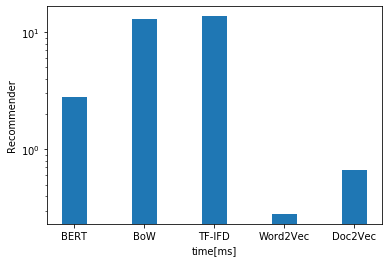

In [175]:
import matplotlib.pyplot as pyplot

def time_recommendation(recommender, names, count):
    xs = range(0, count)
    ts = []
    for i in xs:
        t0 = time.time()
        recommender(names[i], is_verbose=False)
        t1 = time.time() - t0
        ts.append(t1 * 1000)
        
    return ts

def time_and_plot(recommenders, names, count):
    fig = pyplot.figure()
    ax = fig.add_subplot(1, 1, 1)
    labels, ys = [], []
    for name, recommender in recommenders:
        labels.append(name)
        ys.append(np.average(time_recommendation(recommender, names, count)))
    ax.bar(labels, ys, 0.35)
    ax.set_yscale('log')
    pyplot.xlabel('time[ms]')
    pyplot.ylabel('Recommender')
    pyplot.show()

recommenders = [
    ['BERT', bertRecommend],
    ['BoW', bowRecommend],
    ['TF-IFD', tfidfRecommend],
    ['Word2Vec', word2vecRecommend],
    ['Doc2Vec', doc2vecRecommend]
]


time_and_plot(recommenders, names, 1500)

BERT recommender
Fitting took: 194.76079940795898 ms
Fitting took: 61.31601333618164 ms
Fitting took: 59.26203727722168 ms
Fitting took: 62.10780143737793 ms
Fitting took: 59.6158504486084 ms


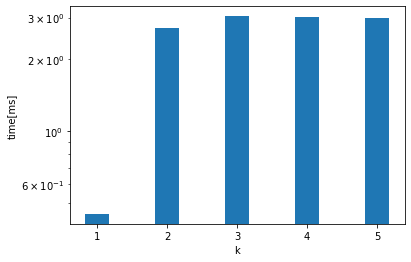

BoW recommender
Fitting took: 48.944711685180664 ms
Fitting took: 0.9210109710693359 ms
Fitting took: 1.0831356048583984 ms
Fitting took: 0.9257793426513672 ms
Fitting took: 1.2481212615966797 ms


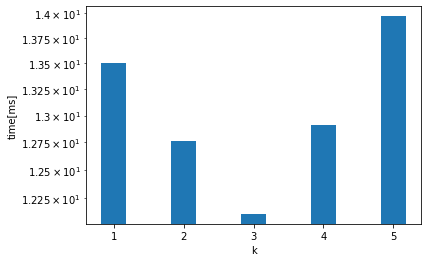

TF-IDF recommender
Fitting took: 64.59808349609375 ms
Fitting took: 1.499176025390625 ms
Fitting took: 1.302957534790039 ms
Fitting took: 1.1551380157470703 ms
Fitting took: 1.4278888702392578 ms


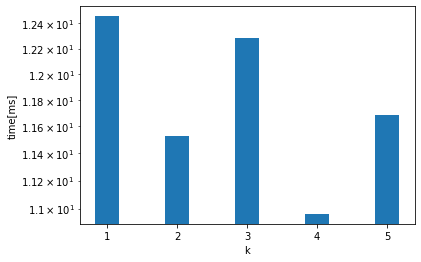

Word2Vec recommender
Fitting took: 1.2578964233398438 ms
Fitting took: 0.5769729614257812 ms
Fitting took: 0.7600784301757812 ms
Fitting took: 0.5581378936767578 ms
Fitting took: 0.49495697021484375 ms


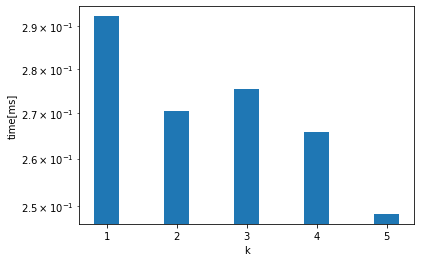

Doc2Vec recommender
Fitting took: 40.27581214904785 ms
Fitting took: 10.082006454467773 ms
Fitting took: 9.567022323608398 ms
Fitting took: 9.048938751220703 ms
Fitting took: 9.334087371826172 ms


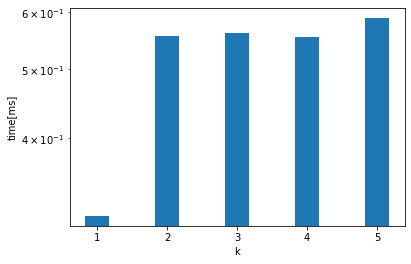

In [174]:
import matplotlib.pyplot as pyplot

def time_nn(vectors, neighbors):
    fitting_start = time.time()
    nn = NearestNeighbors(n_neighbors=neighbors)
    nn.fit(vectors)
    fitting_end = time.time() - fitting_start
    ts = []
    
    for vector in vectors:
        t0 = time.time()
        nn.kneighbors(vector.reshape(1, -1), return_distance=False)
        t1 = time.time() - t0
        ts.append(t1 * 1000)
    return fitting_end, ts

def plot_recommender_times(vectors, i):
    t, ts = time_nn(vectors, i)
    print(f'Fitting took: {t * 1000} ms')
    return np.average(ts)
    
def time_and_plot(vectors, count, message):
    fig = pyplot.figure()
    ax = fig.add_subplot(1, 1, 1)
    labels = range(1, count + 1)
    ys = []
    print(message)
    for i in labels:
        ys.append(plot_recommender_times(vectors, i))
        
    ax.bar(labels, ys, 0.35)
    pyplot.xlabel('k')
    pyplot.ylabel('time[ms]')
    pyplot.show()

time_and_plot(bert_test_vectors, 5, 'BERT recommender')
time_and_plot(bow_test_vectors, 5, 'BoW recommender')
time_and_plot(tfidf_test_vectors, 5, 'TF-IDF recommender')
time_and_plot(word2vec_test_vectors, 5, 'Word2Vec recommender')
time_and_plot(doc2vec_test_vectors, 5, 'Doc2Vec recommender')

##  Vectorization time

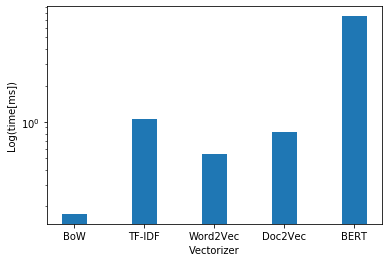

In [192]:
import random
import numpy as np

def choose_random_articles(count):
    articles_idx = []
    for i in range(0,count):
        x = random.randint(0,len(names))
        articles_idx.append(x)
    return articles_idx

def time_vectorization(vectorizer, text):
    t0 = time.time()
    vectorizer([text])
    return (time.time() - t0) * 1000

def plot_vectorization(vectorizer, idxs, texts=articles_test_contents):
    return np.average(np.log([time_vectorization(vectorizer, texts[idx]) for idx in idxs]))
    
    
def time_and_plot(count):
    articles_idx = choose_random_articles(count)
    fig = pyplot.figure()
    ax = fig.add_subplot(1, 1, 1)
    labels = ['BoW', 'TF-IDF', 'Word2Vec', 'Doc2Vec', 'BERT']
    ys = []
    ys.append(plot_vectorization(bow_vectorizer.transform, articles_idx))
    ys.append(plot_vectorization(tfidf_vectorizer.transform, articles_idx))
    ys.append(plot_vectorization(word2vec_vectorizer, articles_idx))
    ys.append(plot_vectorization(doc2vec_vectorizer, articles_idx))
    ys.append(plot_vectorization(bert_vectorizer, articles_idx, X_train))
    
    ax.bar(labels, ys, 0.35)

    ax.set_yscale('log')
    pyplot.xlabel('Vectorizer')
    pyplot.ylabel('Log(time[ms])')
    pyplot.show()
    
time_and_plot(100)


# Accuracy

In [172]:
import random

def choose_random_articles(count):
    articles_idx = []
    for i in range(0,count):
        x = random.randint(0,len(names))
        articles_idx.append(x)
        
    print(articles_idx)
    return articles_idx

accuracy_samples = choose_random_articles(10)

[2414, 1540, 1182, 2566, 707, 1140, 954, 561, 1986, 79]


In [173]:
def style_recommendation(name, recommend, article):
    print(name)
    recommend(article)
    print()
    
def style_article_recommendation(article_id):
    line = "==========="
    article = names[article_id] 
    print(article_id, article)
    style_recommendation("BERT", bertRecommend, article)
    style_recommendation("BoW", bowRecommend, article)
    style_recommendation("TF-IDF", tfidfRecommend, article)
    style_recommendation("Word2Vec", word2vecRecommend, article)
    style_recommendation("Doc2Vec", doc2vecRecommend, article)
    print(line)
    print()

for article_id in accuracy_samples:
    style_article_recommendation(article_id)


2414 Trump strikes blow against Iran nuclear deal
BERT
2414 Trump strikes blow against Iran nuclear deal
643 Trump previews Iran nuclear speech: "I think you're going to...
187 Iran will keep building missiles, Rouhani says

BoW
2414 Trump strikes blow against Iran nuclear deal
643 Trump previews Iran nuclear speech: "I think you're going to...
255 Top News Headlines

TF-IDF
2414 Trump strikes blow against Iran nuclear deal
643 Trump previews Iran nuclear speech: "I think you're going to...
187 Iran will keep building missiles, Rouhani says

Word2Vec
2414 Trump strikes blow against Iran nuclear deal
2443 Rubik's Cuber Shocks Room By Breaking Famed World Record
2060 Hit by a drunken driver at 17, she gives other amputees hope

Doc2Vec
2414 Trump strikes blow against Iran nuclear deal
830 Trump: Being friends with North Korea's Kim is possible
930 Dateline Asia Video


1540 Reuters Newsmaker: Paul Ryan
BERT
1540 Reuters Newsmaker: Paul Ryan
1558 Mnuchin pressed on Trump's false tax claim

In [159]:
accuracy_samples = [415, 672, 978]

In [182]:
bert_vectorizer = build_vectorizer(estimator, build_input_fn)